<div class="alert alert-warning">

**Source Material**:

The following exercises are adapted from Chapter 7 of [Mark Newman's book, "Computational Physics"](http://www-personal.umich.edu/~mejn/cp/)

</div>


# Exercises: DFTs of Various Signals

In this notebook, you will be generating samples from various functions, $f(t)$ over a given duration $t \in [0, T)$ and for a specified number of samples $N$. I.e. the samples are $y_n = f(t_n)$. 

Then you will use the discrete Fourier transform to compute $(c_k)_{k=0}^{\lfloor \frac{N}{2} \rfloor}$ for those samples, and then convert these to $(|a_k|)_{k=0}^{\lfloor \frac{N}{2} \rfloor}$ and $(|\varphi'_k|)_{k=0}^{\lfloor \frac{N}{2} \rfloor}$

You will plot both the sampled wave form of $f$ -- a scatter plot of $(t_n, y_n)$ -- and the Fourier spectrum of $f$ -- a histogram/stem chart of $(|a_k|)_{k=0}^{\lfloor \frac{N}{2} \rfloor}$ vs $(|\nu_k|)_{k=0}^{\lfloor \frac{N}{2} \rfloor}$

Make sure that your time values $t_n$ and frequencies $\nu_k$ all have the appropriate physical units for the specified signal.
E.g. most wave form plots should have "seconds" on the x axis, and most Fourier spectra should have "1/seconds (Hz)" on the x axis.

For all problems, take $N = 1,000$ as the number of samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

%matplotlib inline

(1.5.1) Generate $N=1,000$ samples of a **single period** of a square wave of amplitude $1$, whose period lasts for $5$ seconds. A square wave is like a sine-wave, except a square wave only takes on values of $1$ (wherever $\sin(x)$ is positive) or $-1$ (wherever $\sin(x)$ is negative). An example of eight samples of a single period of a square wave with amplitude 1 is:
```
[1, 1, 1, 1, -1, -1, -1, -1]
```

Also compute the Fourier coefficients, $(|a_k|)_{k=0}^{\lfloor \frac{N}{2} \rfloor}$, for these samples.

Plot the sampled wave form of this square wave versus time and plot the Fourier spectrum, $|a_{k}|$ vs $\nu_{k}$.

Here is some code that you can use to plot these side-by-side:

```python
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
ax1.plot(t, y, marker="o")  # plot time (t) and waveform-samples (y)
ax1.grid()
ax1.set_xlabel("t (seconds)")  # make sure `t` actually represents seconds!

ax2.stem(freqs, amps, basefmt=" ", use_line_collection=True) # plot frequency (freqs) and amplitudes (amps)
ax2.set_xlim(0, 10)
ax2.grid()
ax2.set_ylabel(r"$|a_{k}|$")
ax2.set_xlabel(r"$\nu_{k}$ (Hz)")  # make sure `freqs` actually represents Hertz!
fig.tight_layout()
```



/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_35792/1004119244.py:47: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax2.stem(freqs, amps, basefmt=" ", use_line_collection=True)


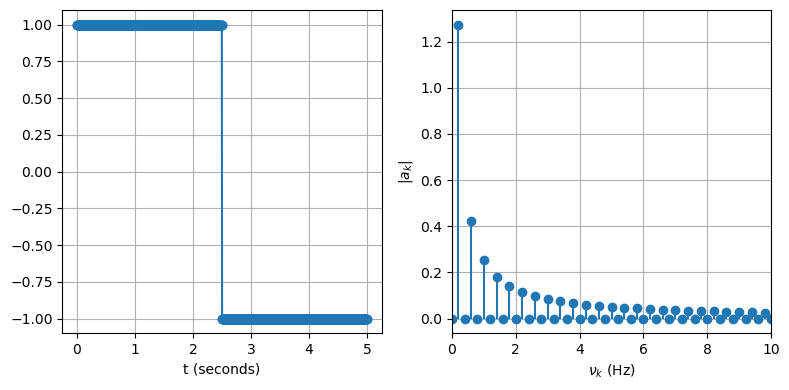

In [2]:
# copied from BasicsOfDFT
def fourier_complex_to_real(
    complex_coeffs: np.ndarray, N: int
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Converts complex-valued Fourier coefficients (of
    real-valued data) to the associated amplitudes and
    phase-shifts of the real-valued sinusoids

    Parameters
    ----------
    complex_coeffs : numpy.ndarray, shape-(N//2 + 1,)
        The complex valued Fourier coefficients for k=0, 1, ...

    N : int
        The number of samples that the DFT was performed on.

    Returns
    -------
    Tuple[numpy.ndarray, numpy.ndarray]
        (amplitudes, phase-shifts)
        Two real-valued, shape-(N//2 + 1,) arrays
    """
    amplitudes = np.abs(complex_coeffs) / N

    # |a_k| = 2 |c_k| / N for all k except for
    # k=0 and k=N/2 (only if N is even)
    # where |a_k| = |c_k| / N
    amplitudes[1 : (-1 if N % 2 == 0 else None)] *= 2

    phases = np.arctan2(-complex_coeffs.imag, complex_coeffs.real)
    return amplitudes, phases

T = 5
N = 1000
t = np.arange(N) / N * T
y = [1] * (N // 2) + [-1] * (N // 2)  # generating the square wave samples

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
ax1.plot(t, y, marker="o")
ax1.grid()
ax1.set_xlabel("t (seconds)")

freqs = np.arange(len(y) // 2 + 1) / T
amps, phases = fourier_complex_to_real(np.fft.rfft(y), N=N)

ax2.stem(freqs, amps, basefmt=" ", use_line_collection=True)
ax2.set_xlim(0, 10)
ax2.grid()
ax2.set_ylabel(r"$|a_{k}|$")
ax2.set_xlabel(r"$\nu_{k}$ (Hz)")
fig.tight_layout()

(1.5.2) $f$ is a simple linear function $f(t) = t$ on $t \in [0, 1000)$ seconds.
Using $N = 1,000$ samples, plot both the sampled waveform and the Fourier spectrum,  $|a_{k}|$ vs $\nu_{k}$.

/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_35792/3812305028.py:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax2.stem(freqs, amps, basefmt=" ", use_line_collection=True)


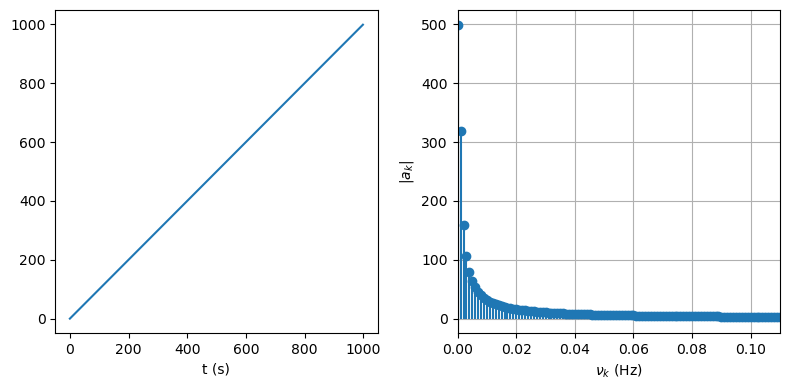

In [3]:
# STUDENT CODE HERE
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

N = 1000
T = 1000
t = np.arange(N) / N * T
y = t

ax1.plot(y)
ax1.set_xlabel("t (s)")

freqs = np.arange(len(y) // 2 + 1) / T
amps, phases = fourier_complex_to_real(np.fft.rfft(y), N=len(y))

ax2.stem(freqs, amps, basefmt=" ", use_line_collection=True)
ax2.set_xlim(0, 0.11)
ax2.grid()
ax2.set_ylabel(r"$|a_{k}|$")
ax2.set_xlabel(r"$\nu_{k}$ (Hz)")
fig.tight_layout()

(1.5.3) $f$ is the modulated wave: $\sin\!\big(2\pi\frac{1}{2Q}t\big) \sin\!\big(2 \pi\frac{10}{Q}t\big)$, where $Q=5\:\mathrm{seconds}$.
Sample this signal starting from $t=0$ **over one period of the lower-frequency term (a.k.a the modulating term):** $\sin\!\big(2\pi\frac{1}{2Q}t\big)$, using $N = 1,000$ samples.

- What are the frequencies of the respective terms in our modulated wave, in Hz? 
- Do you expect that these two frequencies present in the Fourier spectrum? Why might we expect for different frequencies to be prominent in our series (hint: compare the functional form of this waveform to that of a Fourier series)?
- Use the relationship $\sin{(a)}\sin{(b)}=\frac{1}{2}(\cos{(a-b)} - \cos{(a+b)})$ to rewrite this modulated wave as a sum of cosines.
From this, predict the number, locations, and heights of the peaks in your Fourier spectrum.
- Plot the wave form vs time and plot the Fourier spectrum, $|a_{k}|$ vs $\nu_{k}$.
Be sure to zoom in on your peaks and check that they are located where you expect them to be.

> *SOLUTION HERE*

/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_35792/222689692.py:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax2.stem(freqs, amps, basefmt=" ", use_line_collection=True)


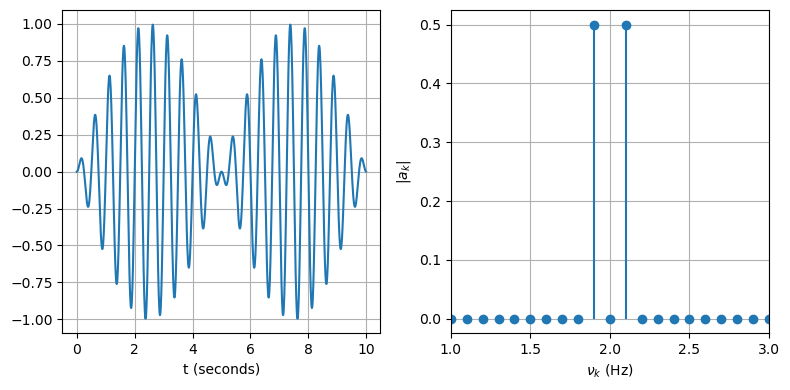

In [4]:
# STUDENT CODE HERE
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

Q = 5
freq_mod_term = 1 / (2 * Q)
period_mod_term = 1 / freq_mod_term

T = period_mod_term  # duration is one period

N = 1000
t = np.arange(N) * T / N
y = np.sin(2 * np.pi / (2 * Q) * t) * np.sin(2 * np.pi * 10 / Q * t)
ax1.plot(t, y)
ax1.grid()
ax1.set_xlabel("t (seconds)")

freqs = np.arange(len(y) // 2 + 1) / T
amps, phases = fourier_complex_to_real(np.fft.rfft(y), N=len(y))

ax2.stem(freqs, amps, basefmt=" ", use_line_collection=True)
ax2.set_xlim(1, 3)
ax2.grid()
ax2.set_ylabel(r"$|a_{k}|$")
ax2.set_xlabel(r"$\nu_{k}$ (Hz)")
fig.tight_layout()

(1.5.4) $f$ is a signal that produced uniform random noise on $[-1, 1)$. `np.random.rand` generates random numbers on $[0, 1)$. Define a Python function `noise`:

```python
def noise(t: np.ndarray) -> np.ndarray:
    # t is a shape-(N,) array
    # Use np.random.rand to draw a shape-(N,)
    # array of uniform random numbers on [0, 1)
    #
    # Modify these numbers so that they instead fall
    # on the range [-1, 1)
    #
    # return these random samples
```

Use this to generate $N = 1,000$ samples of a noisy signal last for $5$ seconds. Plot the sampled wave form and Fourier spectrum.
Do you see any pattern in the Fourier spectrum?

/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_35792/365217544.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax2.stem(freqs, amps, basefmt=" ", use_line_collection=True)


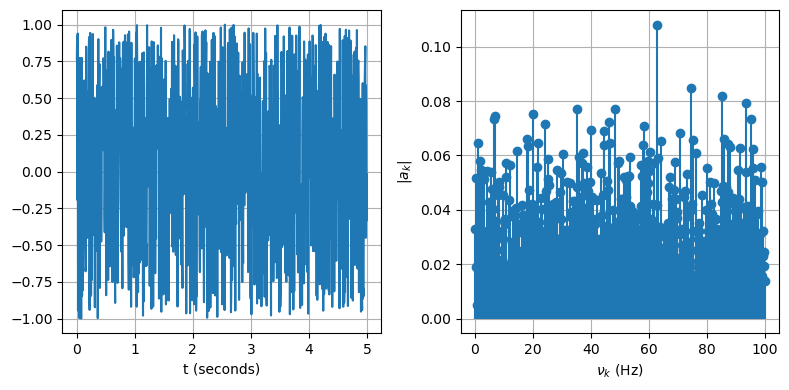

In [5]:
# STUDENT CODE HERE
def noise(t: np.ndarray) -> np.ndarray:
    return 2 * (np.random.rand(*t.shape) - 0.5)


T = 5
N = 1000
t = np.arange(N) / N * T
y = noise(t)
freqs = np.arange(len(y) // 2 + 1) / T
amps, phases = fourier_complex_to_real(np.fft.rfft(y), N=len(y))


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

ax1.plot(t, y)
ax1.grid()
ax1.set_xlabel("t (seconds)")

freqs = np.arange(len(y) // 2 + 1) / T
amps, phases = fourier_complex_to_real(np.fft.rfft(y), N=len(y))

ax2.stem(freqs, amps, basefmt=" ", use_line_collection=True)
ax2.grid()
ax2.set_ylabel(r"$|a_{k}|$")
ax2.set_xlabel(r"$\nu_{k}$ (Hz)")
fig.tight_layout()